## Analysis Notebook

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from helper import Helper as help

### Load Data

In [9]:
cont_unif_data = pd.read_csv('../data/j_cont_unif_dist.csv')
laplace_data = pd.read_csv('../data/j_laplace_dist.csv')
norm_data = pd.read_csv('../data/j_norm_dist.csv')
sec_data = pd.read_csv('../data/j_sec_dist.csv')
trimodal_data = pd.read_csv('../data/j_sixthmom_dist.csv')
rademacher_data = pd.read_csv('../data/j_unif_dist.csv')
sparse_data = pd.read_csv('../data/j_sparse01_dist.csv')
student_data = pd.read_csv('../data/j_student_dist.csv')
sparse_norm_data = pd.read_csv('../data/j_sparsenorm_dist.csv')
irrational_data = pd.read_csv('../data/j_irrational_dist.csv')

# moment matching
five_pt_data = pd.read_csv('../data/j_moment_dist.csv') # new
five_pt_data_large = pd.read_csv('../large_N_data/j_moment7_irrat_distNEW.csv')
sev_mom_rat_data = pd.read_csv('../data/j_moment7_rational_dist.csv')
nine_mom_rat_data = pd.read_csv('../data/j_moment9_rational_dist.csv')

#sparse data
sp_normal_data = pd.read_csv('../sparse_lam_data/j_sparsenorm_dist.csv')
sp_rad_data = pd.read_csv('../sparse_lam_data/j_sparserademacher_dist.csv')
sp_irrational_data = pd.read_csv('../sparse_lam_data/j_sparseirrational_dist.csv')
data_list_sparse = [sp_normal_data, sp_rad_data]

# large n
large_n_data = pd.read_csv('../large_N_data/j_moment7_irrat_dist_relonly2.csv')
large_n_data

,Group,N,Lambda,Time,Energy,std_Time,std_Energy,log_time,avg_log_time
0,0,25,-1,33.371,-0.595959,10.524037,0.086475,"[1.591064607026499, 1.7481880270062005, 1.5440...",1.498625
1,0,40,-1,75.458,-0.624667,17.455779,0.060985,"[2.0530784434834195, 1.9731278535996986, 2.017...",1.865043
2,0,50,-1,111.184,-0.639265,23.910963,0.053212,"[2.0253058652647704, 1.9590413923210936, 2.214...",2.035389
3,0,100,-1,431.934,-0.668762,66.582563,0.036704,"[2.5998830720736876, 2.6748611407378116, 2.647...",2.630122
4,0,150,-1,929.352,-0.681705,114.217941,0.028313,"[3.0310042813635367, 3.0549958615291417, 2.940...",2.964832
5,0,200,-1,1613.306,-0.690067,160.392114,0.023749,"[3.1792644643390253, 3.216957207361097, 3.1911...",3.205523
6,0,300,-1,3452.667,-0.699672,267.652181,0.018163,"[3.588159616383092, 3.48826861549546, 3.520745...",3.536844
7,1,50,-1,111.184,-0.639265,23.910963,0.053212,"[2.0253058652647704, 1.9590413923210936, 2.214...",2.035389
8,1,80,-1,278.676,-0.660083,47.059229,0.041611,"[2.424881636631067, 2.4313637641589874, 2.4265...",2.438752
9,1,100,-1,431.934,-0.668762,66.582563,0.036704,"[2.5998830720736876, 2.6748611407378116, 2.647...",2.630122


### Find greedy and rel alpha

In [3]:
names = ['cont unif', 'laplace', 'norm', 'sec', 'trimodal', 'rademacher', 'sparse', 'student', 'sparse norm', 'irrational', '5_pt', '7 mom rat', '9 mom rat']
data_list = [cont_unif_data, laplace_data, norm_data, sec_data, trimodal_data, rademacher_data, sparse_data, student_data, sparse_norm_data, irrational_data, five_pt_data, sev_mom_rat_data, nine_mom_rat_data]

rel_alphas = []
gr_alphas = []
rel_err = []
gr_err = []

i = 0
print("Reluctant: \n")
for data in data_list:
    df = data[data['Lambda'] == -1]
    a, a_err = help.get_alpha_from_log_time(df)
    rel_alphas.append(a)
    rel_err.append(a_err)
    print(names[i], ": ", a, a_err)
    i += 1

i = 0
print("\nGreedy: \n")
for data in data_list:
    df = data[data['Lambda'] == 0]
    a, a_err = help.get_alpha_from_log_time(df)
    gr_alphas.append(a)
    gr_err.append(a_err)
    print(names[i], ": ", a, a_err)
    i += 1



Reluctant: 

cont unif :  2.0769111571937127 0.004709092072286829
laplace :  2.1176953914741725 0.004803327802454557
norm :  2.0988161482037477 0.004900429538675697
sec :  2.104602627509625 0.00479691640413054
trimodal :  1.6522742500855396 0.0031960919520752245
rademacher :  1.66295077558983 0.0029116028981315462
sparse :  1.774936560248249 0.005128055843575039
student :  2.103422289837855 0.004854129521398753
sparse norm :  2.084813574863257 0.003438539250450415
irrational :  1.989911570595115 0.003940230369937735
5_pt :  1.9227489617348459 0.0029308262922856515
7 mom rat :  1.672393618964516 0.002982335627677324
9 mom rat :  1.6665697876503835 0.002954377955702793

Greedy: 

cont unif :  1.0832817672133312 0.004120556935500916
laplace :  1.0844381850519287 0.0041378312829709885
norm :  1.0883664536110005 0.004143167623368214
sec :  1.085453806454744 0.004136345928503347
trimodal :  1.1258429075197727 0.0028683592122072006
rademacher :  1.1143467706768035 0.0030334650564324836
sparse

Text(0.5, 1.0, 'β vs λ for Different Distributions')

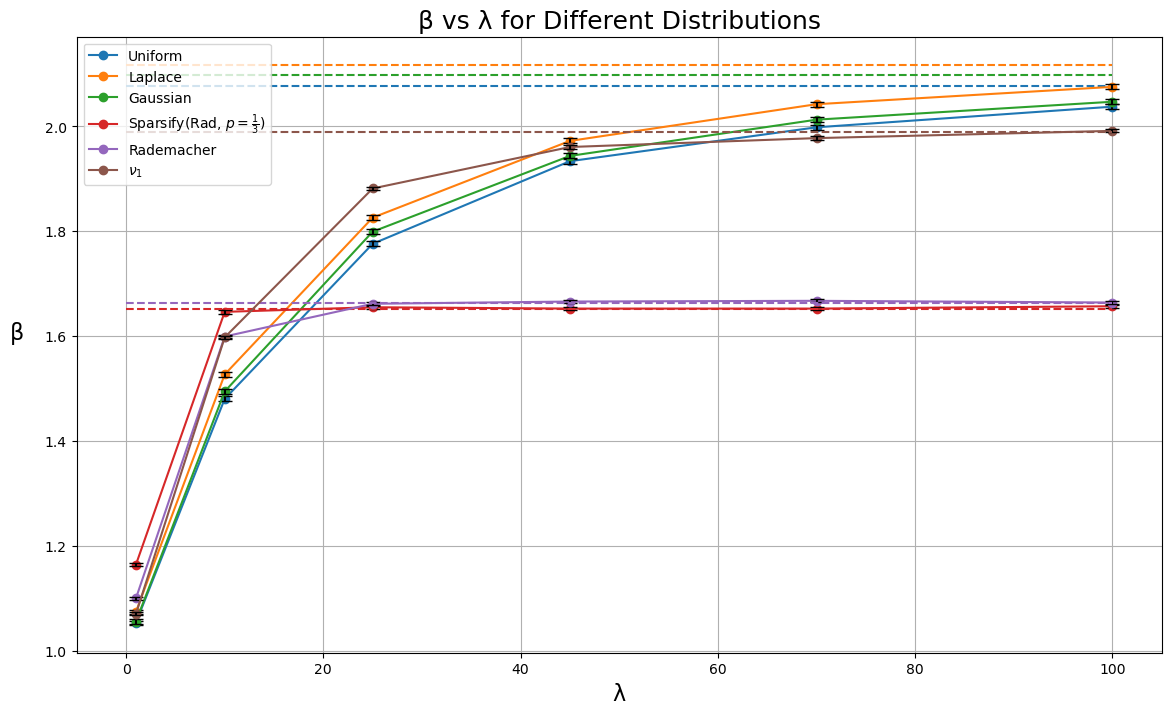

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
lambda_list = [1, 10, 25, 45, 70, 100]
#lam_axis = []
# data_list = [cont_unif_data, laplace_data, norm_data, sec_data, discrete_mom_data, unif_data, sparse_data, student_data]
# names = ['cont unif', 'laplace', 'norm', 'sec', 'sixthmom', 'unif', 'sparse', 'student']

data_list = [cont_unif_data, laplace_data, norm_data, trimodal_data, rademacher_data, irrational_data]
#names = ['Uniform', 'Laplace', 'Gaussian', 'Trimodal', 'Rademacher', 'sparse norm', 'Irrational']; sparse_norm_data
names = ['Uniform', 'Laplace', 'Gaussian', r'Sparsify(Rad, $p = \frac{1}{3}$)', 'Rademacher', r'$\nu_1$']

rel_alphas = []

i = 0
for data in data_list:
    df = data[data['Lambda'] == -1]
    a, a_err = help.get_alpha_from_log_time(df)
    rel_alphas.append(a)
    i += 1

for i in range(len(data_list)):
    data = data_list[i]
    a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
    line, = ax.plot(lambda_list, a_values, label=f'{names[i]}', marker='o')
    ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
    ax.hlines(rel_alphas[i], xmin=0, xmax=100, color=line.get_color(), linestyle='--')

ax.grid()
ax.legend()
ax.set_xlabel('λ', fontsize=16)
ax.set_ylabel('β', fontsize=16, rotation = 0, labelpad = 20)
ax.set_title('β vs λ for Different Distributions', fontsize=18)



## Loglog plots

Gaussian, laplace, rademacher, irrational

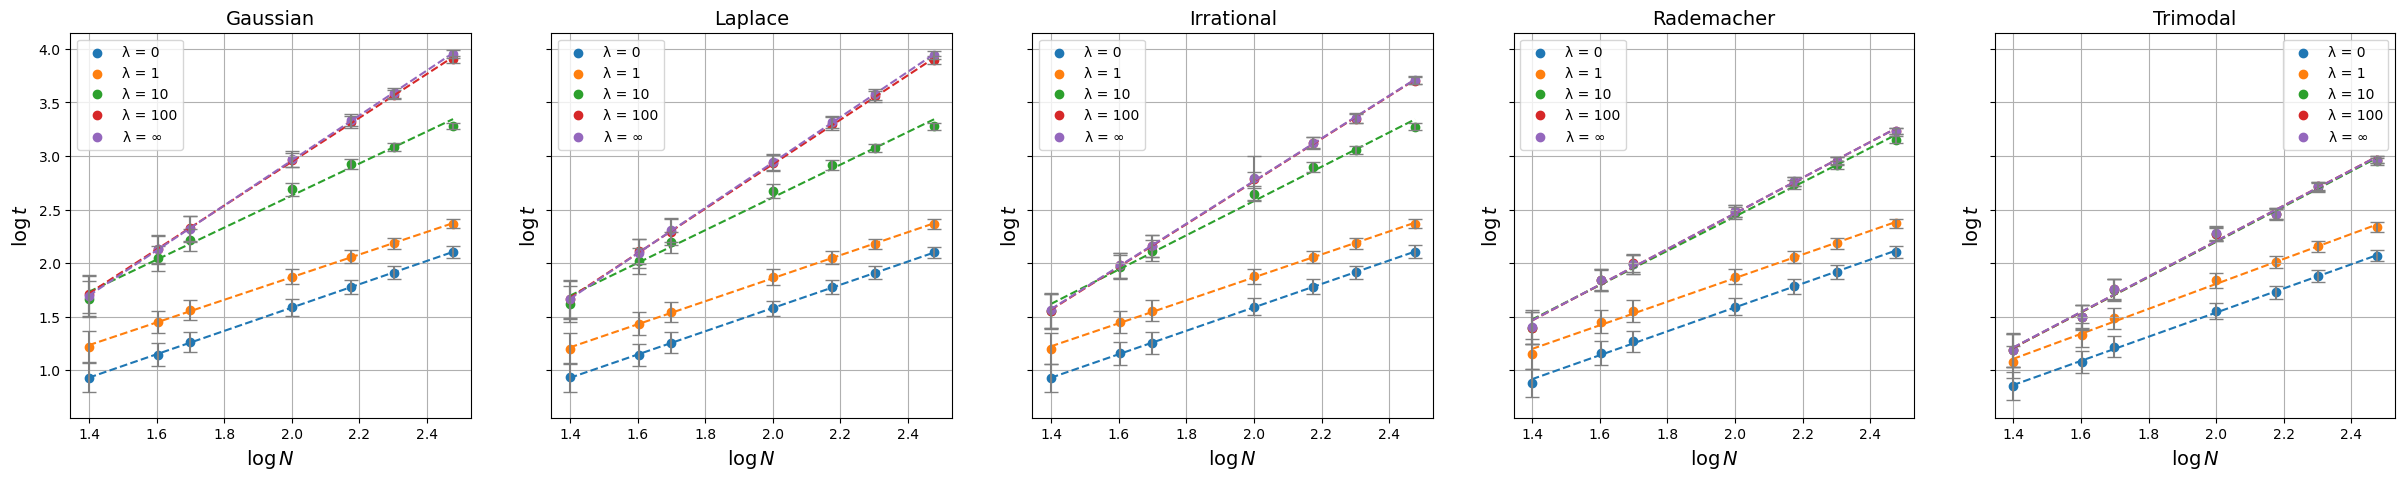

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5), sharey=True)
data_list = [norm_data, laplace_data, irrational_data, rademacher_data, trimodal_data]

names = ['Gaussian', 'Laplace', 'Irrational', 'Rademacher', 'Trimodal']
i = 0
for data in data_list:
    help.plot_log_time(data, ax[i], marker = 'o', title = f'{names[i]}', lambda_values=[0, 1, 10, 100, -1], alpha_label = False)
    i += 1


## $R^2$ analysis

In [6]:
from scipy.stats import linregress
import numpy as np
import pandas as pd
import ast

def compute_alpha_r2_by_lambda(df, lambda_values, n=None):
    rows = []
    for lam in lambda_values:
        sub = df[(df['Lambda'] == lam)] if n is None else df[(df['Lambda'] == lam) & (df['n'] == n)]
        # reuse your processing logic
        aux_x, aux_y, _, _ = help.process_log_data(sub)
        if len(aux_x) < 2:  # guard
            continue
        slope, intercept, r, p, stderr = linregress(aux_x, aux_y)
        r2 = r * r
        rows.append({
            "Lambda": lam,
            "alpha": slope,
            "alpha_stderr": stderr,
            "R2": r2
        })
    return pd.DataFrame(rows).sort_values("Lambda").reset_index(drop=True)


In [7]:
summary = []
for name, data in zip(names, data_list):
    tbl = compute_alpha_r2_by_lambda(data, lambda_list)
    tbl.insert(0, "Distribution", name)
    summary.append(tbl)
summary_df = pd.concat(summary, ignore_index=True)
#summary_df

## Moment matching

Rademacher, Trimodal, 5 point, Gaussian

Text(0.5, 1.0, 'β vs λ for Different Distributions')

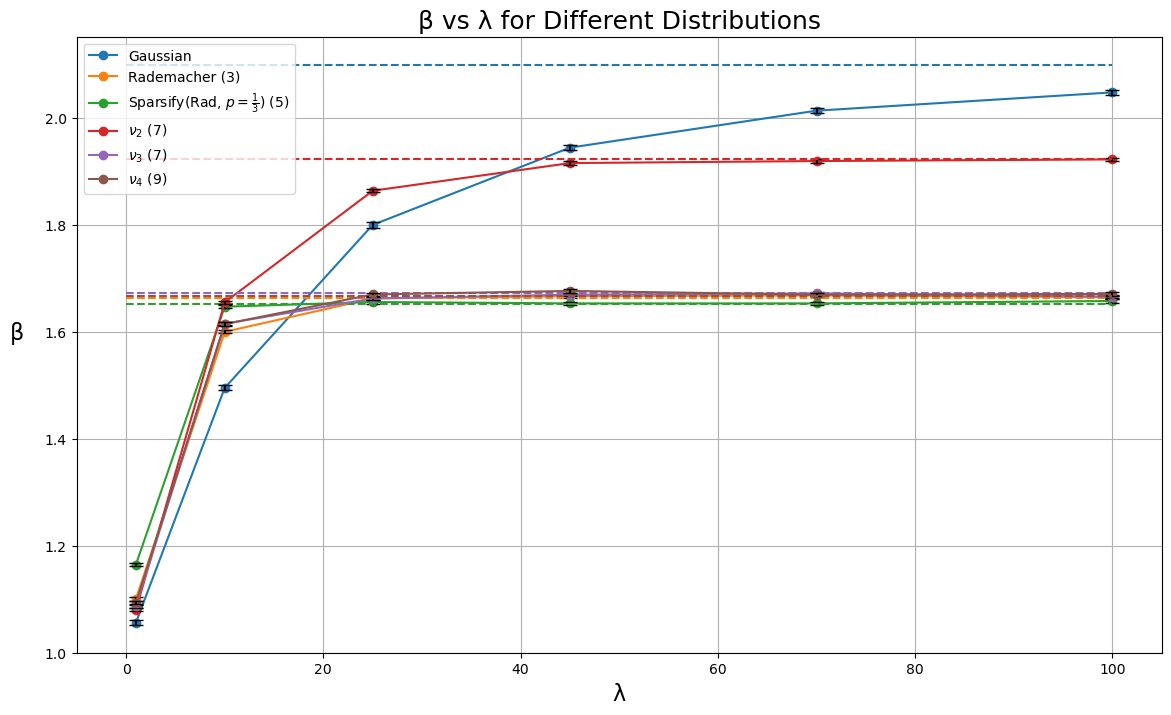

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
lambda_list = [1, 10, 25, 45, 70, 100]
#lam_axis = []
data_list = [norm_data, rademacher_data, trimodal_data, five_pt_data, sev_mom_rat_data, nine_mom_rat_data]
names = ['Gaussian', 'Rademacher (3)', r'Sparsify(Rad, $p = \frac{1}{3}$) (5)', r'$\nu_2$ (7)', r'$\nu_3$ (7)', r'$\nu_4$ (9)']

rel_alphas = []

i = 0
for data in data_list:
    df = data[data['Lambda'] == -1]
    a, a_err = help.get_alpha_from_log_time(df)
    rel_alphas.append(a)
    i += 1

for i in range(len(data_list)):
    data = data_list[i]
    a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
    line, = ax.plot(lambda_list, a_values, label=f'{names[i]}', marker='o')
    ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
    ax.hlines(rel_alphas[i], xmin=0, xmax=100, color=line.get_color(), linestyle='--')

ax.grid()
ax.legend()
ax.set_xlabel('λ', fontsize=16)
ax.set_ylabel('β', fontsize=16, rotation = 0, labelpad = 20)
ax.set_title('β vs λ for Different Distributions', fontsize=18)



### Five point limit analysis

Text(0.5, 1.0, 'α vs λ for Different Distributions')

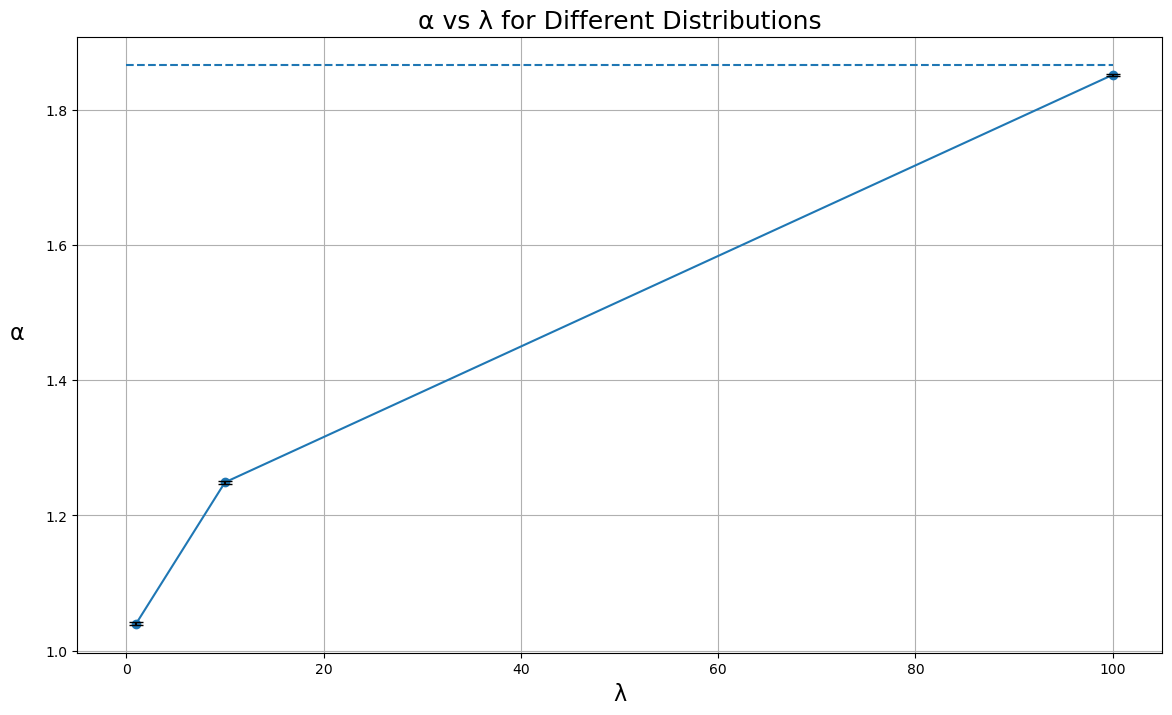

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
lambda_list = [1, 10, 100]

data = five_pt_data_large
df = data[data['Lambda'] == -1]
rel_alpha, a_err = help.get_alpha_from_log_time(df)


a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
line, = ax.plot(lambda_list, a_values, label=f'{names[i]}', marker='o')
ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
ax.hlines(rel_alpha, xmin=0, xmax=100, color=line.get_color(), linestyle='--')

ax.grid()
ax.set_xlabel('λ', fontsize=16)
ax.set_ylabel('α', fontsize=16, rotation = 0, labelpad = 20)
ax.set_title('α vs λ for Different Distributions', fontsize=18)



## Discrete Support, Discrepancy Zero

Irrational, Gaussian, Trimodal

Text(0.5, 1.0, 'β vs λ for Different Distributions')

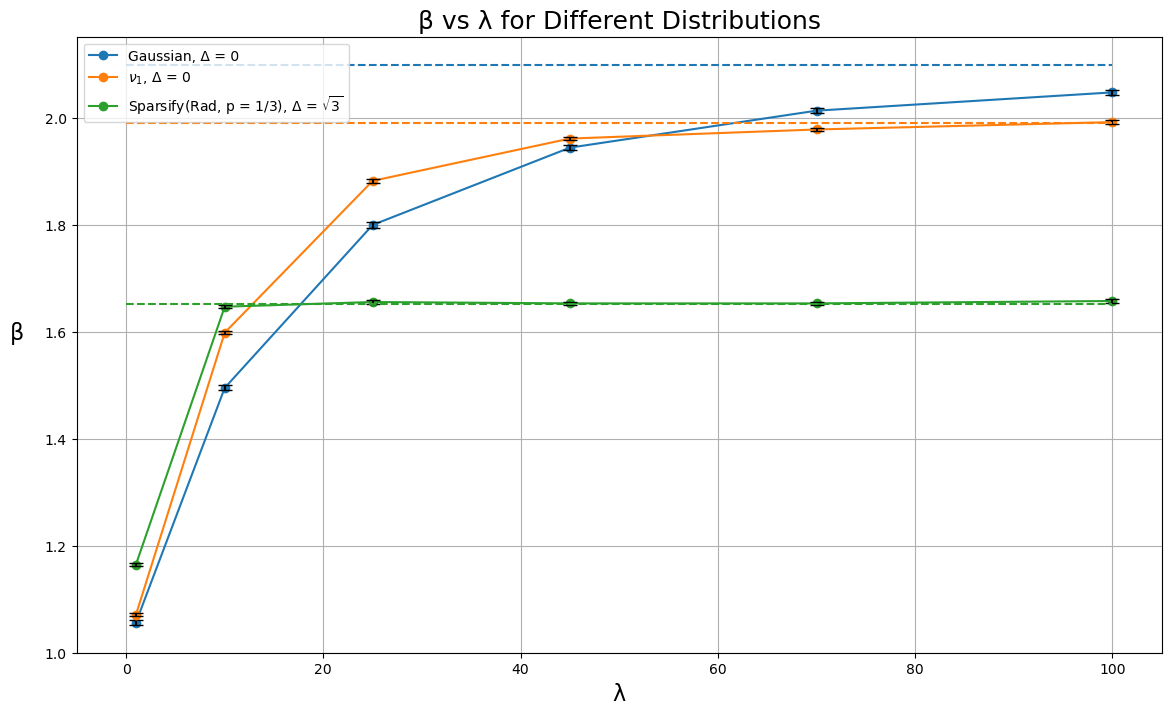

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
lambda_list = [1, 10, 25, 45, 70, 100]
#lam_axis = []
data_list = [norm_data, irrational_data, trimodal_data]
names = ['Gaussian', r'$\nu_1$', 'Sparsify(Rad, p = 1/3)']
delta = [0, 0, r'$\sqrt{3}$']

rel_alphas = []

i = 0
for data in data_list:
    df = data[data['Lambda'] == -1]
    a, a_err = help.get_alpha_from_log_time(df)
    rel_alphas.append(a)
    i += 1

for i in range(len(data_list)):
    data = data_list[i]
    a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
    line, = ax.plot(lambda_list, a_values, label=f'{names[i]}, Δ = {delta[i]}', marker='o')
    ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
    ax.hlines(rel_alphas[i], xmin=0, xmax=100, color=line.get_color(), linestyle='--')

ax.grid()
ax.legend()
ax.set_xlabel('λ', fontsize=16)
ax.set_ylabel('β', fontsize=16, rotation = 0, labelpad = 20)
ax.set_title('β vs λ for Different Distributions', fontsize=18)



## Interpolation Gaussian + Discrete

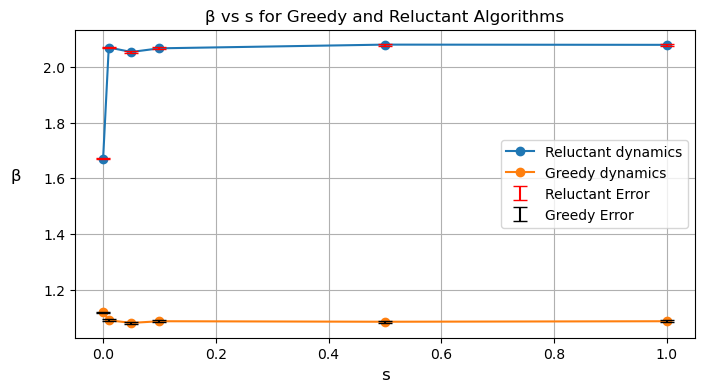

In [11]:
from scipy.stats import linregress

s_vals = [0, 0.01, 0.05, 0.1, 0.5, 1]
exp_greedy_data = pd.read_csv('../data/exp_mixed_greedy_results.csv')
exp_rel_data = pd.read_csv('../data/exp_mixed_reluctant_results.csv')

def get_alpha_from_log_time(df, s):
    data = df[df['s'] == s]
    x_vals, y_vals, _, _ = help.process_log_data(data)
    slope, intercept, _, _, std_err = linregress(x_vals, y_vals)
    return slope, std_err

alpha_reluctant = []
SE_reluctant = []
alpha_greedy = []
SE_greedy = []
for s in s_vals:
    alpha_g, SE_g = get_alpha_from_log_time(exp_greedy_data, s)
    alpha_r, SE_r = get_alpha_from_log_time(exp_rel_data, s)
    
    alpha_greedy.append(alpha_g)
    alpha_reluctant.append(alpha_r)
    SE_greedy.append(SE_g)
    SE_reluctant.append(SE_r)

fig, axes = plt.subplots(1, 1, figsize=(8, 4))

axes.plot(s_vals, alpha_reluctant, marker = 'o', label='Reluctant dynamics')
axes.plot(s_vals, alpha_greedy, marker = 'o', label='Greedy dynamics')

axes.errorbar(s_vals, alpha_reluctant, yerr=SE_reluctant, label='Reluctant Error', marker=' ', linestyle=' ', capsize=5, color='red')
axes.errorbar(s_vals, alpha_greedy, yerr=SE_greedy, label='Greedy Error', marker=' ', linestyle=' ', capsize=5, color='black')


axes.set_xlabel('s', fontsize=12)
axes.set_ylabel('β', fontsize=12, labelpad=20, rotation = 0)
axes.grid()
axes.set_title('β vs s for Greedy and Reluctant Algorithms')
axes.legend()


## Sparsity

### Irrational

Text(0.5, 1.0, 'α vs λ for Different Distributions')

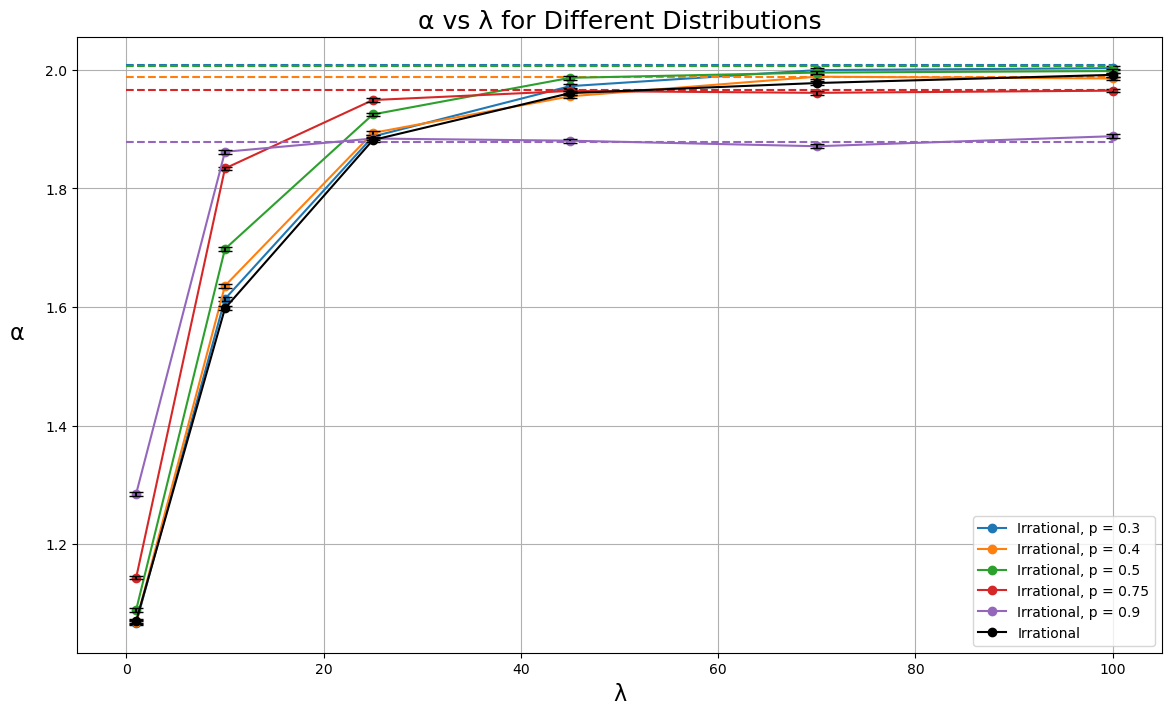

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
lambda_list = [1, 10, 25, 45, 70, 100]
data_list_sparse = [sp_irrational_data]
names = ['Irrational']
p_vals = [0.3, 0.4, 0.5, 0.75, 0.9]

rel_alphas = []

i = 0
for data in data_list_sparse:
    for p in p_vals:
        df = data[(data['Lambda'] == -1) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        rel_alphas.append(a)
        i += 1

for i in range(len(data_list_sparse)):
    for p in p_vals: 
        data = data_list_sparse[i]
        data = data[data['p'] == p]
        a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
        line, = ax.plot(lambda_list, a_values, label=f'{names[i]}, p = {p}', marker='o')
        ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
        # plot dashed limits for all p_values
        df = data[(data['Lambda'] == -1)]
        a, a_err = help.get_alpha_from_log_time(df)
        ax.hlines(a, xmin=0, xmax=100, color=line.get_color(), linestyle='--')

# plot for no sparsity
a_values, se_values = help.plot_log_time(irrational_data, ax, show=False, lambda_values=lambda_list)
line, = ax.plot(lambda_list, a_values, label=f'Irrational', marker='o', color = 'black')
ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')

ax.grid()
ax.legend()
ax.set_xlabel('λ', fontsize=16)
ax.set_ylabel('α', fontsize=16, rotation = 0, labelpad = 20)
ax.set_title('α vs λ for Different Distributions', fontsize=18)



### Rademacher

Text(0.5, 1.0, 'α vs λ for Different Distributions')

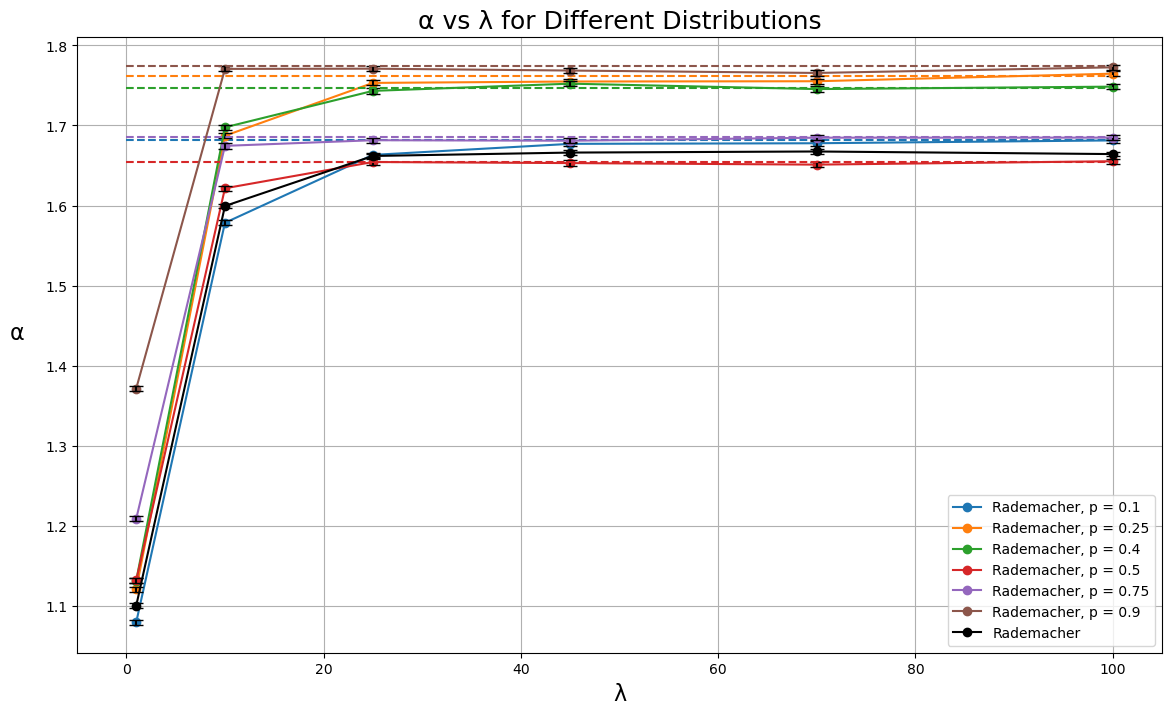

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
lambda_list = [1, 10, 25, 45, 70, 100]
data_list_sparse = [sp_rad_data]
names = ['Rademacher']
p_vals = [0.1, 0.25, 0.4, 0.5, 0.75, 0.9]

for i in range(len(data_list_sparse)):
    for p in p_vals: 
        data = data_list_sparse[i]
        data = data[data['p'] == p]
        a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
        line, = ax.plot(lambda_list, a_values, label=f'{names[i]}, p = {p}', marker='o')
        ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
        df = data[(data['Lambda'] == -1)]
        a, a_err = help.get_alpha_from_log_time(df)
        ax.hlines(a, xmin=0, xmax=100, color=line.get_color(), linestyle='--')

#change data
a_values, se_values = help.plot_log_time(rademacher_data, ax, show=False, lambda_values=lambda_list)
line, = ax.plot(lambda_list, a_values, label=f'Rademacher', marker='o', color = 'black')
ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')

ax.grid()
ax.legend()
ax.set_xlabel('λ', fontsize=16)
ax.set_ylabel('α', fontsize=16, rotation = 0, labelpad = 20)
ax.set_title('α vs λ for Different Distributions', fontsize=18)



### Gaussian

Text(0.5, 1.0, 'α vs λ for Different Distributions')

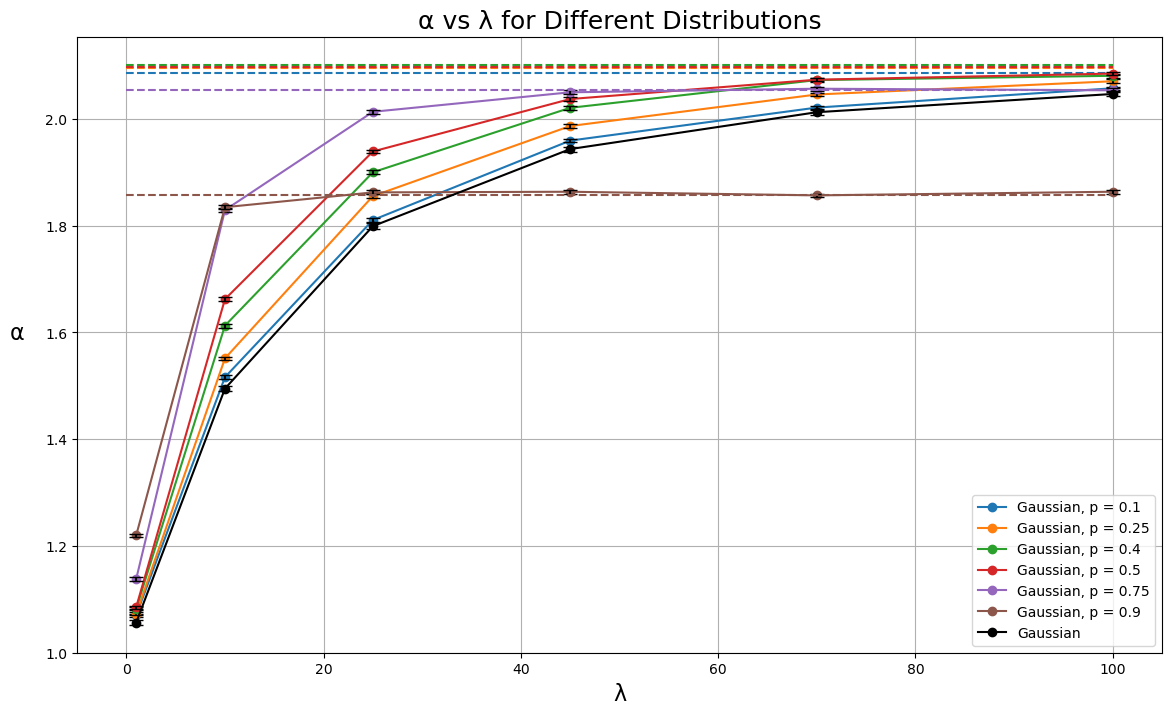

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
lambda_list = [1, 10, 25, 45, 70, 100]
data_list_sparse = [sp_normal_data]
names = ['Gaussian']
p_vals = [0.1, 0.25, 0.4, 0.5, 0.75, 0.9]

for i in range(len(data_list_sparse)):
    for p in p_vals: 
        data = data_list_sparse[i]
        data = data[data['p'] == p]
        a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
        line, = ax.plot(lambda_list, a_values, label=f'{names[i]}, p = {p}', marker='o')
        ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
        df = data[(data['Lambda'] == -1)]
        a, a_err = help.get_alpha_from_log_time(df)
        ax.hlines(a, xmin=0, xmax=100, color=line.get_color(), linestyle='--')

#change data
a_values, se_values = help.plot_log_time(norm_data, ax, show=False, lambda_values=lambda_list)
line, = ax.plot(lambda_list, a_values, label=f'Gaussian', marker='o', color = 'black')
ax.errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')

ax.grid()
ax.legend()
ax.set_xlabel('λ', fontsize=16)
ax.set_ylabel('α', fontsize=16, rotation = 0, labelpad = 20)
ax.set_title('α vs λ for Different Distributions', fontsize=18)



### All 3

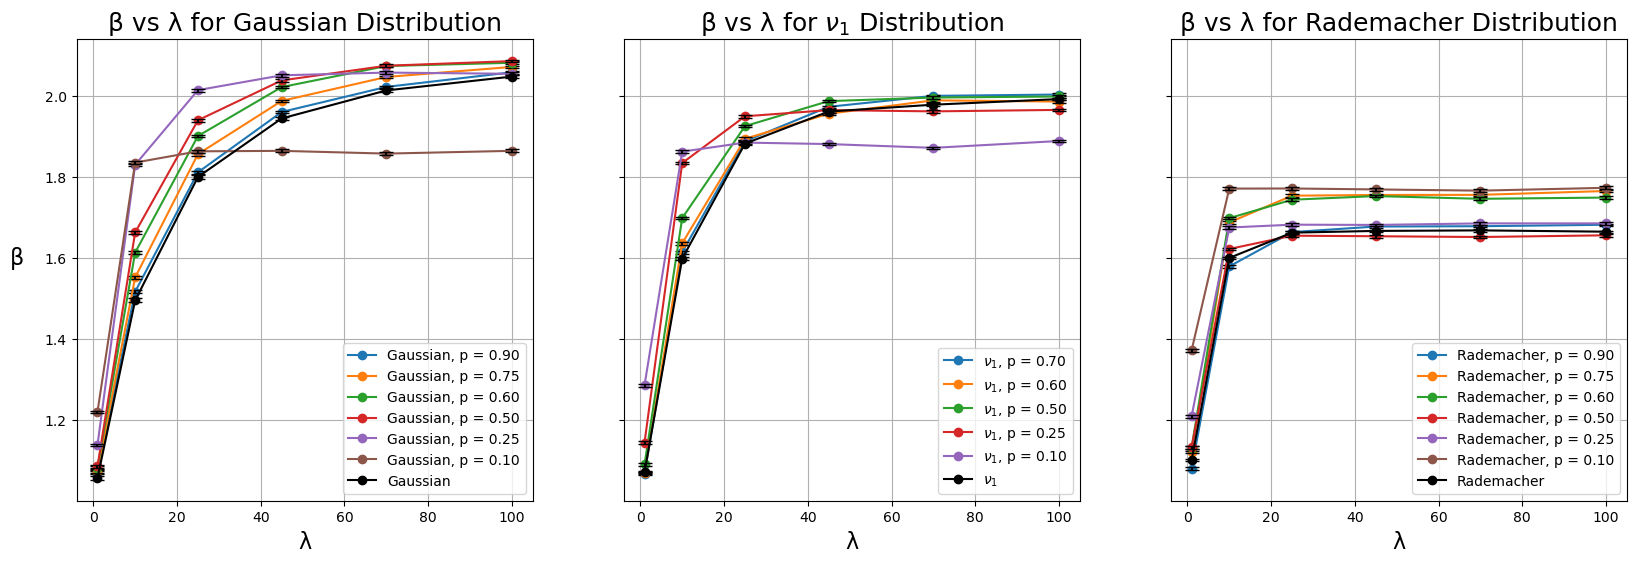

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
lambda_list = [1, 10, 25, 45, 70, 100]
data_list_sparse = [sp_normal_data, sp_irrational_data, sp_rad_data]
data_list = [norm_data, irrational_data, rademacher_data]
names = ['Gaussian', r'$\nu_1$', 'Rademacher']

for i in range(len(data_list_sparse)):
    if names[i] == r'$\nu_1$':
        p_vals = [0.3, 0.4, 0.5, 0.75, 0.9]
    else:
        p_vals = [0.1, 0.25, 0.4, 0.5, 0.75, 0.9]
    for p in p_vals: 
        data = data_list_sparse[i]
        data = data[data['p'] == p]
        a_values, se_values = help.plot_log_time(data, ax, show=False, lambda_values=lambda_list)
        line, = ax[i].plot(lambda_list, a_values, label=f'{names[i]}, p = {1-p:.2f}', marker='o')
        ax[i].errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')
        df = data[(data['Lambda'] == -1)]
        a, a_err = help.get_alpha_from_log_time(df)
        #ax[i].hlines(a, xmin=0, xmax=100, color=line.get_color(), linestyle='--')

    a_values, se_values = help.plot_log_time(data_list[i], ax, show=False, lambda_values=lambda_list)
    line, = ax[i].plot(lambda_list, a_values, label=f'{names[i]}', marker='o', color = 'black')
    ax[i].errorbar(lambda_list, a_values, yerr=se_values, marker=' ', linestyle=' ', capsize=5, color='black')

    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('λ', fontsize=16)
    ax[0].set_ylabel('β', fontsize=16, rotation = 0, labelpad = 20)
    ax[i].set_title(f'β vs λ for {names[i]} Distribution', fontsize=18)



## Solving for moment matching distributions

In [16]:
import sympy as sp

def solve_weights_fraction(a, b, c):
    # Define symbols
    w1, w2, w3 = sp.symbols('w1 w2 w3')

    # Build the equations
    eqs = [
        sp.Eq(w1*a**2 + w2*b**2 + w3*c**2, 1),
        sp.Eq(w1*a**4 + w2*b**4 + w3*c**4, 3),
        sp.Eq(w1*a**6 + w2*b**6 + w3*c**6, 15),
    ]

    # Solve the linear system
    sol = sp.solve(eqs, (w1, w2, w3), dict=True)[0]

    # Probabilities p_i = w_i / 2
    p1, p2, p3 = sol[w1]/2, sol[w2]/2, sol[w3]/2

    return sol, (sp.simplify(p1), sp.simplify(p2), sp.simplify(p3))

# Example: a=1, b=2, c=3
weights, probs = solve_weights_fraction(1, 2, 3)

print("Weights w:", weights)
print("Probabilities p:", probs)
print("Sum of probabilities:", sum(probs))


Weights w: {w1: 1/2, w2: 1/10, w3: 1/90}
Probabilities p: (1/4, 1/20, 1/180)
Sum of probabilities: 11/36


In [17]:
import sympy as sp

def solve_weights_fraction(a, b, c, d):
    # Define symbols
    w1, w2, w3, w4 = sp.symbols('w1 w2 w3 w4')

    # Build the equations (moments 2,4,6,8)
    eqs = [
        sp.Eq(w1*a**2 + w2*b**2 + w3*c**2 + w4*d**2, 1),
        sp.Eq(w1*a**4 + w2*b**4 + w3*c**4 + w4*d**4, 3),
        sp.Eq(w1*a**6 + w2*b**6 + w3*c**6 + w4*d**6, 15),
        sp.Eq(w1*a**8 + w2*b**8 + w3*c**8 + w4*d**8, 105),
    ]

    # Solve the linear system
    sol = sp.solve(eqs, (w1, w2, w3, w4), dict=True)[0]

    # Probabilities p_i = w_i / 2
    p1, p2, p3, p4 = sol[w1]/2, sol[w2]/2, sol[w3]/2, sol[w4]/2
    probs = (sp.simplify(p1), sp.simplify(p2), sp.simplify(p3), sp.simplify(p4))

    return sol, probs

# Example: a=1, b=2, c=3, d=4
weights, probs = solve_weights_fraction(1, 2, 3, 4)

print("Weights w:", weights)
print("Probabilities p:", probs)
print("Sum of probabilities:", sum(probs))


Weights w: {w1: 29/60, w2: 13/120, w3: 11/1260, w4: 1/3360}
Probabilities p: (29/120, 13/240, 11/2520, 1/6720)
Sum of probabilities: 173/576


In [18]:
from fractions import Fraction
p1 = Fraction(29, 120)
p2 = Fraction(13, 240)
p3 = Fraction(11, 2520)
p4 = Fraction(1, 6720)

# Remaining probability goes to 0
p0 = 1 - 2*(p1 + p2 + p3 + p4)
p0

Fraction(115, 288)

## Large N Moment Matching

Reluctant: 

small :  1.903539100011847 0.002929556494437201
mid :  1.8994302955587896 0.0019527982692065377
big :  1.8644753921783566 0.0013125055014407121


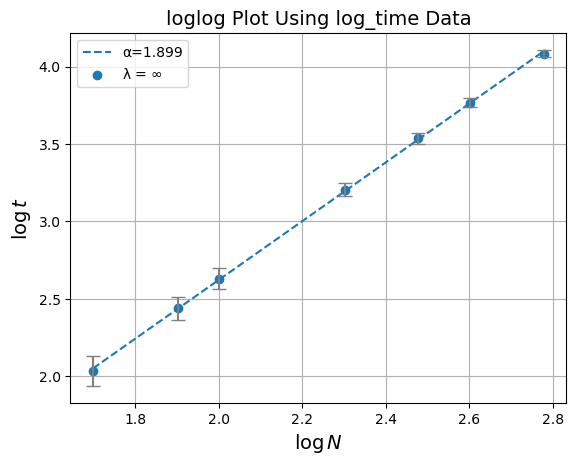

In [28]:
names = ['small', 'mid', 'big']
data_list = [large_n_data[large_n_data['Group'] == 0], large_n_data[large_n_data['Group'] == 1], large_n_data[large_n_data['Group'] == 2]]

rel_alphas = []
rel_err = []

i = 0
print("Reluctant: \n")
for data in data_list:
    df = data[data['Lambda'] == -1]
    a, a_err = help.get_alpha_from_log_time(df)
    rel_alphas.append(a)
    rel_err.append(a_err)
    print(names[i], ": ", a, a_err)
    i += 1

fig, ax = plt.subplots(1,1)
a_values, se_values = help.plot_log_time(large_n_data[large_n_data['Group'] == 1], ax=ax, show=True, lambda_values=[-1])


In [11]:
import pandas as pd

files = []
for i in range(25):
    files.append(f"../sparse_rel_data/j_sparserademacher_dist_03_{i}.csv")

dfs = []
for i, file in enumerate(files, start=1):
    df = pd.read_csv(file)
    print(i)
    df["run"] = i
    dfs.append(df)

# merge all runs into one DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# save to new CSV
merged_df.to_csv("../sparse_rel_data/merged_runs_03.csv", index=False)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [ ]:
df = pd.read_csv("../sparse_rel_data/merged_runs_01.csv")


(350, 10)
